In [1]:
#importing the dataset
import pandas as pd

data = pd.read_excel('Mushroom Subset.xlsx') 
#classifier in column 1, sms in column 2.
data.head()


,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE
2,EDIBLE,BELL,SCALY,WHITE,BRUISES,ALMOND
3,EDIBLE,BELL,SCALY,YELLOW,BRUISES,ANISE
4,POISONOUS,CONVEX,SMOOTH,BROWN,BRUISES,PUNGENT


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
Type of mushroom    14 non-null object
cap-shape           14 non-null object
cap-surface         14 non-null object
cap-color           14 non-null object
bruises             14 non-null object
odor                14 non-null object
dtypes: object(6)
memory usage: 752.0+ bytes


In [3]:
data

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE
2,EDIBLE,BELL,SCALY,WHITE,BRUISES,ALMOND
3,EDIBLE,BELL,SCALY,YELLOW,BRUISES,ANISE
4,POISONOUS,CONVEX,SMOOTH,BROWN,BRUISES,PUNGENT
5,EDIBLE,CONVEX,SMOOTH,GRAY,NO,NONE
6,POISONOUS,CONVEX,FIBROUS,GRAY,NO,FOUL
7,POISONOUS,CONVEX,SCALY,GRAY,NO,FOUL
8,POISONOUS,FLAT,SMOOTH,WHITE,BRUISES,FOUL
9,POISONOUS,FLAT,SCALY,PINK,BRUISES,NONE


In [4]:
#data['label']=data['Type of mushroom'].map({'EDIBLE':1,'POISONOUS':0})

In [5]:
data

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE
2,EDIBLE,BELL,SCALY,WHITE,BRUISES,ALMOND
3,EDIBLE,BELL,SCALY,YELLOW,BRUISES,ANISE
4,POISONOUS,CONVEX,SMOOTH,BROWN,BRUISES,PUNGENT
5,EDIBLE,CONVEX,SMOOTH,GRAY,NO,NONE
6,POISONOUS,CONVEX,FIBROUS,GRAY,NO,FOUL
7,POISONOUS,CONVEX,SCALY,GRAY,NO,FOUL
8,POISONOUS,FLAT,SMOOTH,WHITE,BRUISES,FOUL
9,POISONOUS,FLAT,SCALY,PINK,BRUISES,NONE


In [6]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
data1=data.copy()
df_categorical = data1.select_dtypes(include=['object'])
df_categorical.head()

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE
2,EDIBLE,BELL,SCALY,WHITE,BRUISES,ALMOND
3,EDIBLE,BELL,SCALY,YELLOW,BRUISES,ANISE
4,POISONOUS,CONVEX,SMOOTH,BROWN,BRUISES,PUNGENT


In [7]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,0,1,4,5,0,0
1,0,1,3,5,0,1
2,0,0,2,5,0,0
3,0,0,2,6,0,1
4,1,1,3,1,0,5


In [8]:
# concat df_categorical with original df
df = pd.concat([data1, df_categorical], axis=1)
df.head()

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,0,1,4,5,0,0
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ANISE,0,1,3,5,0,1
2,EDIBLE,BELL,SCALY,WHITE,BRUISES,ALMOND,0,0,2,5,0,0
3,EDIBLE,BELL,SCALY,YELLOW,BRUISES,ANISE,0,0,2,6,0,1
4,POISONOUS,CONVEX,SMOOTH,BROWN,BRUISES,PUNGENT,1,1,3,1,0,5


In [9]:
df_categorical

,Type of mushroom,cap-shape,cap-surface,cap-color,bruises,odor
0,0,1,4,5,0,0
1,0,1,3,5,0,1
2,0,0,2,5,0,0
3,0,0,2,6,0,1
4,1,1,3,1,0,5
5,0,1,3,3,1,4
6,1,1,1,3,1,2
7,1,1,2,3,1,2
8,1,2,3,5,0,2
9,1,2,2,4,0,4


In [10]:
data2=df_categorical
y=data2['Type of mushroom']
del data2['Type of mushroom']
x=data2.copy()

In [11]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor
0,1,4,5,0,0
1,1,3,5,0,1
2,0,2,5,0,0
3,0,2,6,0,1
4,1,3,1,0,5


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Type of mushroom, dtype: int32

In [13]:
#splitting the data in to train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
#to checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 5)
(3, 5)
(11,)
(3,)


In [15]:
#building the model using bernouliNB
from sklearn.naive_bayes import BernoulliNB

Br= BernoulliNB()
#fit the model
model=Br.fit(x_train,y_train)
#pridict
y_pred=model.predict(x_test)
#prob_score
y_pred_prob=model.predict_proba(x_test)

# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

In [16]:
y_pred

array([0, 1, 1])

In [17]:
y_test

3    0
7    1
6    1
Name: Type of mushroom, dtype: int32

In [18]:
y_pred_prob

array([[0.51856156, 0.48143844],
       [0.48912605, 0.51087395],
       [0.48912605, 0.51087395]])

In [19]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1, 0],
       [0, 2]], dtype=int64)

In [20]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FN = confusion[0, 1]
FP = confusion[1, 0]
TP = confusion[1, 1]

[[1 0]
 [0 2]]


In [21]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# area under the curve
print (roc_auc)

1.0


In [22]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.510874,0.0,0.0
1,0.510874,1.0,0.0
2,0.481438,1.0,1.0


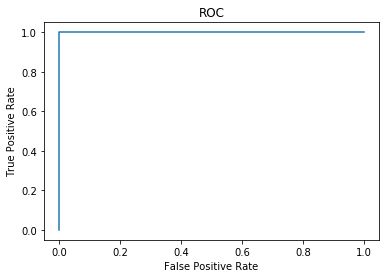

In [23]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [24]:
# training the NB model using multinomial and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
model=mnb.fit(x_train,y_train)

# predict class
y_pred = mnb.predict(x_test)

# predict probabilities
y_pred_proba =mnb.predict_proba(x_test)


# printing the overall accuracy
metrics.accuracy_score(y_test, y_pred)


0.6666666666666666

In [25]:
y_pred

array([0, 0, 1])

In [26]:
y_test

3    0
7    1
6    1
Name: Type of mushroom, dtype: int32

In [27]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1, 0],
       [1, 1]], dtype=int64)

In [28]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# area under the curve
print (roc_auc)

1.0


In [29]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,1.510874,0.0,0.0
1,0.510874,1.0,0.0
2,0.481438,1.0,1.0


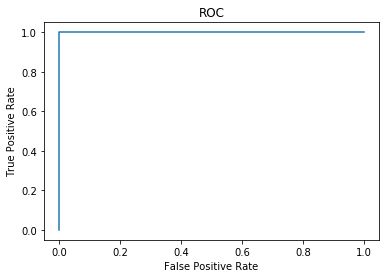

In [30]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)